In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

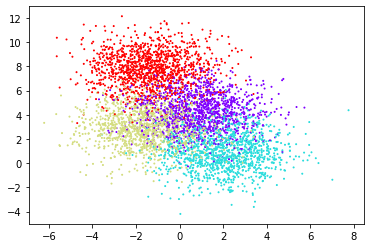

In [5]:
[X_train, y_train, X_test, y_test] = np.load("TP5a.npy",allow_pickle=True) 
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap='rainbow'); 
plt.show()

In [14]:
print('La dimension de X_test est:',np.shape(X_test))
print('La dimension de X_train est:',np.shape(X_train))
print('La dimension de y_test est:',np.shape(y_test))
print('La dimension de y_train est:',np.shape(y_train))
#il y a 4900 points dans la base d'apprentissage et 100 dans la base de test

La dimension de X_test est: (100, 2)
La dimension de X_train est: (4900, 2)
La dimension de y_test est: (100,)
La dimension de y_train est: (4900,)


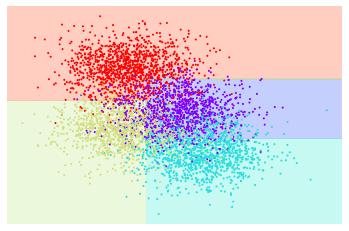

|--- feature_1 <= 5.19
|   |--- feature_0 <= -0.56
|   |   |--- feature_1 <= 3.31
|   |   |   |--- class: 2
|   |   |--- feature_1 >  3.31
|   |   |   |--- class: 2
|   |--- feature_0 >  -0.56
|   |   |--- feature_1 <= 2.09
|   |   |   |--- class: 1
|   |   |--- feature_1 >  2.09
|   |   |   |--- class: 0
|--- feature_1 >  5.19
|   |--- feature_1 <= 6.91
|   |   |--- feature_0 <= -0.33
|   |   |   |--- class: 3
|   |   |--- feature_0 >  -0.33
|   |   |   |--- class: 0
|   |--- feature_1 >  6.91
|   |   |--- feature_1 <= 7.93
|   |   |   |--- class: 3
|   |   |--- feature_1 >  7.93
|   |   |   |--- class: 3



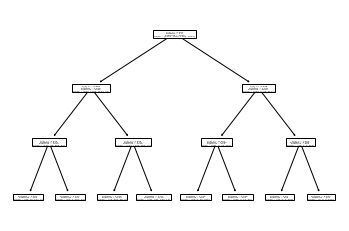

In [31]:
def visualize_classifier(model, X, y): 
  ax = plt.gca() # Plot the training points 
  ax.scatter(X[:, 0], X[:, 1], c=y, s=1, cmap='rainbow', clim=(y.min(), y.max()), zorder=3) 
  ax.axis('tight') 
  ax.axis('off') 
  xlim = ax.get_xlim() 
  ylim = ax.get_ylim() 
  xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200)) 
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape) 
  # Create a color plot with the results 
  n_classes = len(np.unique(y)) 
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap='rainbow', zorder=1) 
  ax.set(xlim=xlim, ylim=ylim) 
  plt.show()


tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = 3) 
tree1.fit(X_train, y_train) 
visualize_classifier(tree1, X_train, y_train) 
tree.plot_tree(tree1) 
text_representation = tree.export_text(tree1) 
print(text_representation)

In [28]:
#avec les données Xtrain et ytrain fourni, on sait la position des points sur le 
#plan en 2D avec les features (features 0 = axe des abscisse et features 1 = axe des ordonné)
# et leur label associé (c'est le tout premier graph plot du google collab)
#ensuite la fonction DecisionTreeClassifier détermine une approximation /une zone des classes (à partir de la
#base d'apprentissage) avec le raisonnement suivant:
#-----------
#max_depth = le nb de branche max avant d'atteindre une feuille de l'arbre
#features = parametre (par exemple: le poids, taille, couleur)

#si possible on teste toute les combinaisons de features possibles pour determiner la classe,
#cela peut donc etre extremement long, Mais ici on a imposé un max_depth à 2, ce qui
#signifie que on ne peut avoir que 2 branches avant une feuille autrement dit, on ne peut
#poser que 2 questions à partir du départ avant de prendre une décision sur la classe

#au bout de 2 questions on doit donner notre avis sur la classe de l'element que l'on
#souhaite classifier même si on a pas pu poser toites les questions que l'on pourrait potentiellement (theoriquement) poser
#-------------
#On obtient donc le 2eme graph (avec les zones et les points), les points ont la couleur de leur classe réelles, les couleurs des zones
#sont les classes approximé par la fonction DecisionTreeClassifier

#Le graph de l'arbre représente le raisonnement de DecisionTreeClassifier pour assigner les classes
#Le texte avec les features... représente le raisonnement (dans l'ordre) de DecisionTreeClassifier


#changer le max_depth change donc les questions posés et donc la classification et par conséquent les zones attribuées à chaque classe
#un max_depth trop faible= toutes les classes ne sont pas représenté
#un max_depth trop haut = trop d'exception dans les zones (un peu comme un KPPV avec k=1)

In [32]:
#on garde un max_depth = 3 car il semble bien convenir

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred = tree1.predict(X_test) 
C=confusion_matrix(y_test, y_pred) 
print(classification_report(y_test, y_pred)) 
print('Accuracy= ',accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        26
           1       0.88      0.78      0.82        27
           2       0.71      0.57      0.63        21
           3       0.85      0.88      0.87        26

    accuracy                           0.74       100
   macro avg       0.75      0.73      0.74       100
weighted avg       0.75      0.74      0.74       100

Accuracy=  0.74


In [40]:
#f1-score = moyenne harmonisé de la precision et du rappel
#support = nb d'element
#macro avg = moyenne ??
#weighted avg = moyenne pondéré ????

In [57]:
for m in range(1,20):
  tree1 = DecisionTreeClassifier(criterion='entropy', max_depth = m) 
  tree1.fit(X_train, y_train) 
  y_pred = tree1.predict(X_test) 
  C=confusion_matrix(y_test, y_pred) 
  #print(classification_report(y_test, y_pred)) 
  print('Accuracy= ',accuracy_score(y_test, y_pred))

Accuracy=  0.53
Accuracy=  0.61
Accuracy=  0.74
Accuracy=  0.74
Accuracy=  0.75
Accuracy=  0.75
Accuracy=  0.74
Accuracy=  0.72
Accuracy=  0.73
Accuracy=  0.76
Accuracy=  0.73
Accuracy=  0.75
Accuracy=  0.71
Accuracy=  0.75
Accuracy=  0.75
Accuracy=  0.75
Accuracy=  0.75
Accuracy=  0.74
Accuracy=  0.77


In [58]:
#si je relance la boucle , les scores changent pour une raison inconnu donc pour afficher l'arbre
#correspondant au max je sais pas